In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
data.shape

(235795, 56)

In [3]:
data[data['label'] == 0].head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
11,mw42508.txt,http://www.teramill.com,22,www.teramill.com,16,0,com,82.644628,1.000000,0.522907,...,0,0,0,0,0,0,0,0,1,0
20,mw16985.txt,http://www.f0519141.xsph.ru,26,www.f0519141.xsph.ru,20,0,ru,55.284926,0.923077,0.018013,...,0,0,0,0,0,0,0,0,0,0
21,mw131249.txt,http://www.shprakserf.gq,24,www.shprakserf.gq,17,0,gq,56.551141,1.000000,0.000053,...,0,0,0,0,0,0,0,0,0,0
27,7972389.txt,https://service-mitld.firebaseapp.com/,37,service-mitld.firebaseapp.com,29,0,com,64.645264,0.480000,0.522907,...,0,0,0,0,0,0,0,0,0,0
28,mw34096.txt,http://www.kuradox92.lima-city.de,32,www.kuradox92.lima-city.de,26,0,de,45.849802,0.526316,0.032650,...,0,0,0,1,0,0,1,0,1,0


In [4]:
data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

# Dataset Descriptions
## Features (TODO check validity of this ai generated description for features)
- **URL**: The complete URL of the website being analyzed.
- **URLLength**: The total number of characters in the URL.
- **Domain**: The main domain name extracted from the URL.
- **DomainLength**: The length of the domain name in characters.
- **IsDomainIP**: A binary indicator of whether the domain is an IP address (1 for true, 0 for false).
- **TLD**: The top-level domain of the URL (e.g., .com, .org).
- **URLSimilarityIndex**: A numerical index representing the similarity of the URL to known phishing URLs.
- **CharContinuationRate**: The rate at which characters in the URL are repeated consecutively.
- **TLDLegitimateProb**: The probability that the top-level domain is legitimate based on historical data.
- **URLCharProb**: The probability of encountering specific characters in the URL based on historical data.
- **TLDLength**: The length of the top-level domain in characters.
- **NoOfSubDomain**: The number of subdomains present in the URL.
- **HasObfuscation**: A binary indicator of whether the URL contains obfuscation techniques (1 for true, 0 for false).
- **NoOfObfuscatedChar**: The number of characters in the URL that are obfuscated.
- **ObfuscationRatio**: The ratio of obfuscated characters to the total number of characters in the URL.
- **NoOfLettersInURL**: The total number of alphabetic characters in the URL.
- **LetterRatioInURL**: The ratio of letters to the total number of characters in the URL.
- **NoOfDegitsInURL**: The total number of numeric digits in the URL.
- **DegitRatioInURL**: The ratio of digits to the total number of characters in the URL.
- **NoOfEqualsInURL**: The number of equal signs (`=`) present in the URL.
- **NoOfQMarkInURL**: The number of question marks (`?`) present in the URL.
- **NoOfAmpersandInURL**: The number of ampersands (`&`) present in the URL.
- **NoOfOtherSpecialCharsInURL**: The number of other special characters in the URL (excluding `=`, `?`, and `&`).
- **SpacialCharRatioInURL**: The ratio of special characters to the total number of characters in the URL.
- **IsHTTPS**: A binary indicator of whether the URL uses HTTPS (1 for true, 0 for false).
- **LineOfCode**: The total number of lines of code in the webpage.
- **LargestLineLength**: The length of the longest line of code in the webpage.
- **HasTitle**: A binary indicator of whether the webpage has a title (1 for true, 0 for false).
- **Title**: The title of the webpage, if present.
- **DomainTitleMatchScore**: A score indicating the match between the domain name and the webpage title.
- **URLTitleMatchScore**: A score indicating the match between the URL and the webpage title.
- **HasFavicon**: A binary indicator of whether the webpage has a favicon (1 for true, 0 for false).
- **Robots**: The content of the robots.txt file, which indicates how search engines should interact with the site.
- **IsResponsive**: A binary indicator of whether the webpage is responsive (1 for true, 0 for false).
- **NoOfURLRedirect**: The number of redirects that occur when accessing the URL.
- **NoOfSelfRedirect**: The number of self-referential redirects in the URL.
- **HasDescription**: A binary indicator of whether the webpage has a meta description (1 for true, 0 for false).
- **NoOfPopup**: The number of pop-up elements present on the webpage.
- **NoOfiFrame**: The number of iframe elements present on the webpage.
- **HasExternalFormSubmit**: A binary indicator of whether the webpage has forms that submit data to external sites (1 for true, 0 for false).
- **HasSocialNet**: A binary indicator of whether the webpage has social network links (1 for true, 0 for false).
- **HasSubmitButton**: A binary indicator of whether the webpage has a submit button (1 for true, 0 for false).
- **HasHiddenFields**: A binary indicator of whether the webpage contains hidden form fields (1 for true, 0 for false).
- **HasPasswordField**: A binary indicator of whether the webpage has a password input field (1 for true, 0 for false).
- **Bank**: A binary indicator of whether the webpage is related to banking services (1 for true, 0 for false).
- **Pay**: A binary indicator of whether the webpage is related to payment services (1 for true, 0 for false).
- **Crypto**: A binary indicator of whether the webpage is related to cryptocurrency services (1 for true, 0 for false).
- **HasCopyrightInfo**: A binary indicator of whether the webpage contains copyright information (1 for true, 0 for false).
- **NoOfImage**: The total number of images present on the webpage.
- **NoOfCSS**: The total number of CSS files linked or embedded in the webpage.
- **NoOfJS**: The total number of JavaScript files linked or embedded in the webpage.
- **NoOfSelfRef**: The number of self-referential links within the webpage.
- **NoOfEmptyRef**: The number of empty references (links with no destination) present in the webpage.
- **NoOfExternalRef**: The number of external references (links to other domains) present in the webpage.

## Label
- 1: indicates legitimate url
- 2: phishing url

# Processing Data
There are 54 total features in this dataset and some of them are test but not test like data like url. 
For the first run let me just take the numerical data provided in the dataset and leave the feature engineering (which i think is also done quite a bit in the dataset) for later.

In [5]:
selected_features = ['URLLength', 'DomainLength', 'IsDomainIP',
       'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef']

In [6]:
X = data[selected_features]
y = data['label']

In [7]:
X.shape, y.shape

((235795, 49), (235795,))

In [8]:
X.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000


In [9]:
# spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=43)

# Visualizing Data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
numerical_features = ['URLLength', 'DomainLength',
       'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
        'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength',
       'DomainTitleMatchScore', 'URLTitleMatchScore',
        'NoOfURLRedirect',
       'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef']

categorical_features = ['IsDomainIP',
       'HasObfuscation', 'IsHTTPS',
       'HasTitle',
       'HasFavicon', 'IsResponsive', 'HasDescription',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo']

In [12]:
sum(X_train['URLLength'] > 100)

2939

In [13]:
# for feature in numerical_features:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='label', y=feature, data=X_train.join(y_train))
#     plt.title(f'Box Plot of {feature} by label')

In [14]:
#for feature in categorical_features:
#    plt.figure(figsize=(10,6))
#    sns.countplot(x=feature, hue='label', data=X_train.join(y_train))
#    plt.title(f'Count Plot of {feature} by label')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=6, n_neighbors=4)

In [25]:
y_pred = knn.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9978371042642974

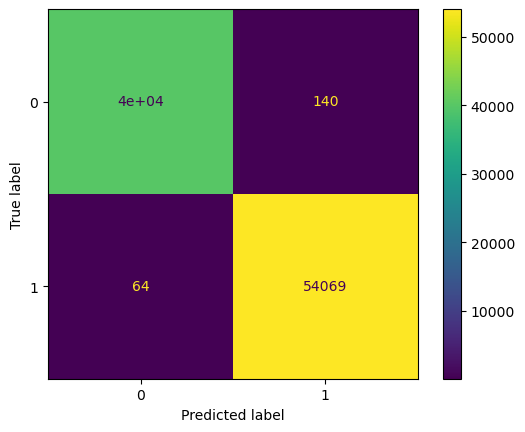

In [27]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=y_pred) * 100, "%")

Accuracy:  100.0 %


In [31]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=y_pred) * 100, "%")

Accuracy:  98.60684068788566 %


In [32]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=y_pred) * 100, "%")

Accuracy:  99.90457812930724 %


In [33]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(dtc, f)

# References
- [Dataset](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)
- [Paper](https://www.sciencedirect.com/science/article/pii/S0167404823004558)